<a href="https://colab.research.google.com/github/TillVollmer5/Semester_Project_DSF_J.Lorenzetti_T.Vollmer/blob/main/Tutorial%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1
This notebook serves as documentation for the downloading and the processing steps of the PDB.

*Transfering of the .pdb file:*

A connection was established using PuTTY, by inserting the IP adress, port 22 group name and the password.
The Chemzilla server was accessed using RDB (Windows), after connection was established the .pdb file was transfered to the server using filezilla (IP adress, username, password and port: 22 was used to connect to the server).
For the molecular dynamics calculation, the linux terminal on the Chemzilla server was used in combination with the GROMACS programm and a precleaned PDB file provided by Sacha Javor.

*Applying force field:*

First we changed the directory to the desktop, in which we were working, using the command:

```
cd Desktop
```

The force field was applied using the command:

```
gmx pdb2gmx -f 1hvh.pdb-cleaned.pdb -o 1hvh_processed.gro -water spce
```

The command opens a menu which show different force fields. We applied the all-atom OPLS force field (Option 15). This yielded new files that will be used in the next steps.
The contents of the topology files was examined.

**EXPLAIN THE FILES!!!!!**

*Solvation:*

A box was defined using the editconf comand displayed in the following command:

```
gmx editconf -f 1hvh_processed.gro -o 1hvh_newbox.gro -c -d 1.0 -bt cubic
```

The protein is now centered in a cube with a minimum distance of 1 nm distance to the to the protein.
For the following solvation step, this command was used:

```
gmx solvate -cp 1hvh_newbox.gro -cs spc216.gro -o 1hvh_solv.gro -p topol.top
```

This yielded a file named '1hvh_solv.gro', which shows how much water was added and hence shows the topology changes due to the addition of the water.

*Adding Ions:*

In this step, the charges are addabted, by first creating a .tpr file from the 1hvh_solf.gro, topol.top and ions.mdp file, which was downloaded from a link provided in the tutorial. This was done using the following command:

```
gmx grompp -f ions.mdp -c 1hvh_solv.gro -p topol.top -o ions.tpr
```

The ions were added using the following command, which yields the file 1hvh_solv_ions.gro:


```
gmx genion -s ions.tpr -o 1hvh_solv_ions.gro -p topol.top -pname NA -nname CL -neutral
```


*Energy minimalization:*

The following command was used to introduce the imput parameters (provided in the tutorial) for the energy minimization:

```
gmx grompp -f minim.mdp -c 1hvh_solv_ions.gro -p topol.top -o em.tpr
```

This command creats a file named em.tpr. In the next step, the energy minimization was done, by executing the command:

```
gmx mdrun -v -deffnm em
```

This yielded several new files. Additionaly a plot was created using the XMGrace software preinstalled on the Chemzilla server.

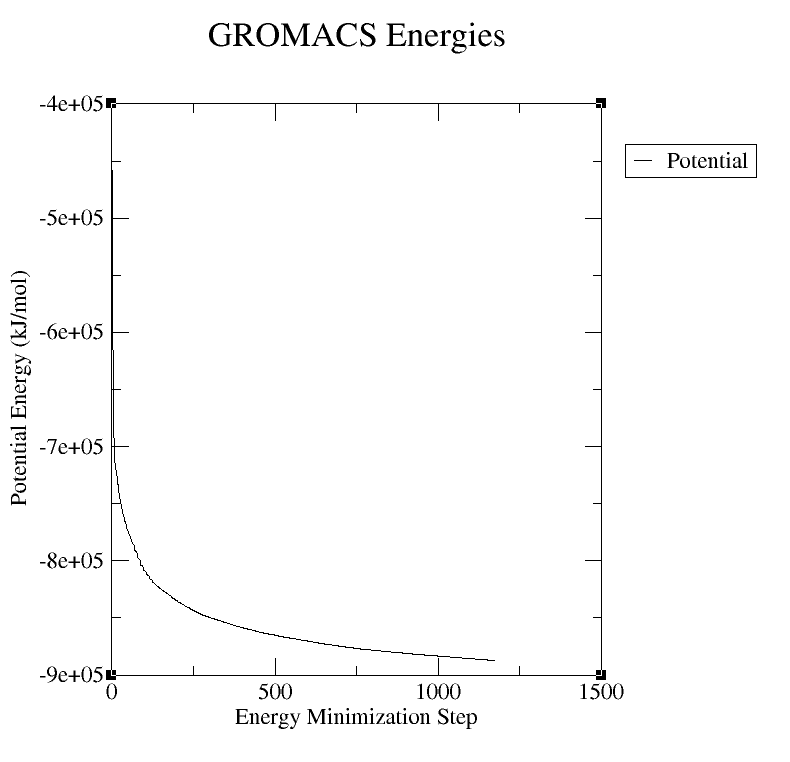



*Equilibration:*

The equilibation was first done for temperature using the following two commands (the .mdp file was provided in the tutorial):

```
gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr
gmx ndrun -deffnm nvt
```

This step required about 10 min to complete. First we did not finish the calculation, as we thought that a probleme occured, hence we did not obtain the new file used in the next steps. A plot of the equilibration was created using XMGrace.

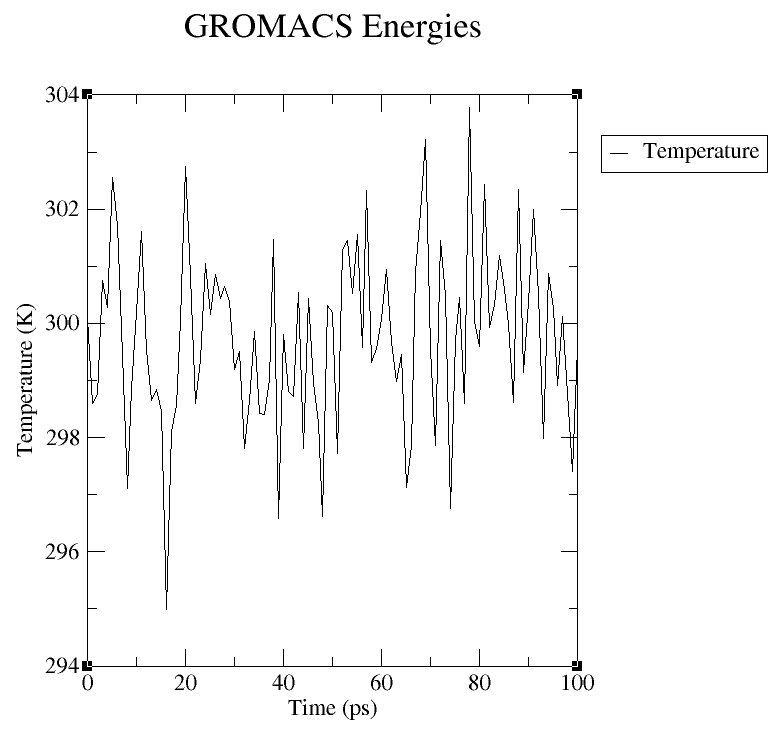



The second equilibration was done for pressure, using these commands (.mdp file was provided in the tutorial):

```
gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr
gmx mdrun -deffnm npt
```

Similar to the temperature equilibration, this step took a few minutes to process. A plot of the pressure equilibration as well as the density were created using XMGrace.

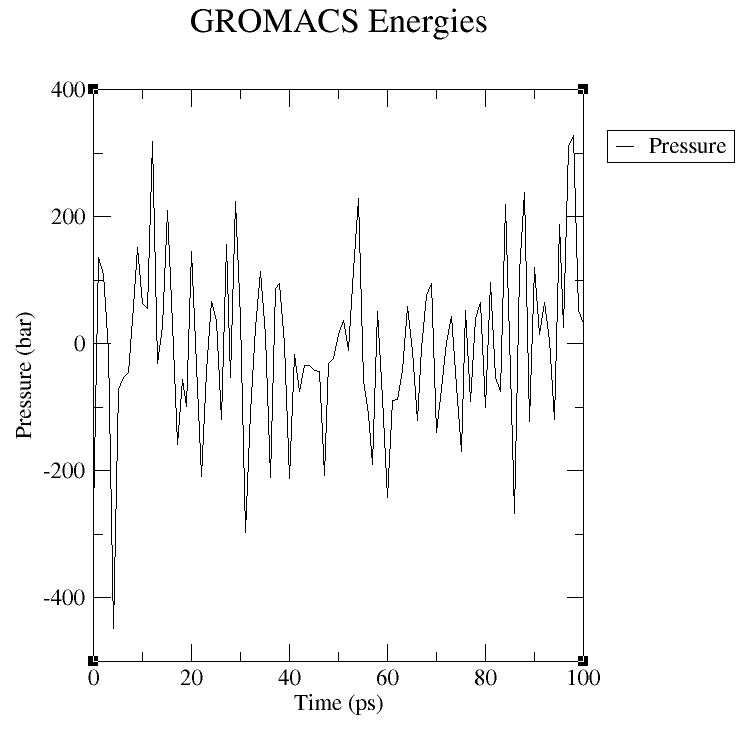



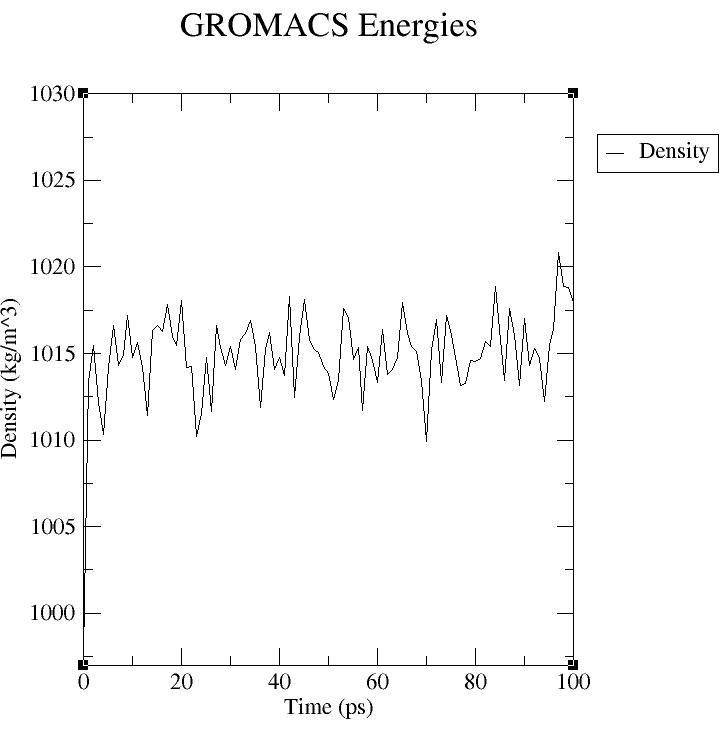



*Next steps of the tutorial, mainly the production run on CPU and GPU and the following analysis of the data, are documented in the notebook called: Ubelix and Tutorial 2*


